Exemplo retirado de [Diego Souza (INPE)](https://github.com/diegormsouza)

# **1° Passo:** Instalando as bibliotecas

netcdf4, boto3 e cartopy

In [ ]:
!pip install -q netcdf4 boto3

!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

In [ ]:
!pip install -q 'gdal==3.0.4'

gdal

In [ ]:
!dpkg -l | grep libgdal

ii  libgdal-dev                               3.4.3+dfsg-1~jammy0                     amd64        Geospatial Data Abstraction Library - Development files
ii  libgdal30                                 3.4.3+dfsg-1~jammy0                     amd64        Geospatial Data Abstraction Library
ii  libgdal32                                 3.6.4+dfsg-1~jammy0                     amd64        Geospatial Data Abstraction Library


In [ ]:
!ogrinfo --version

GDAL 3.6.4, released 2023/04/17


In [ ]:
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ubuntugis-unstable/ubuntu/ jammy main'
Description:
Unstable releases of Ubuntu GIS packages. These releases are more bleeding edge and while generally they should work well, they dont receive the same amount of quality assurance as our stable releases do.
More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ubuntugis-unstable
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ubuntugis-unstable-jammy.list
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ubuntugis-unstable-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ubuntugis-unstable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ubuntugis-unstable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ubuntugis-unstable.gpg with fingerprint 6B827C12C2D425E227EDCA750

In [ ]:
!apt update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ubuntugis-unstable/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
65 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [ ]:
!apt-get install gdal-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
The following package was automatically installed and is no longer required:
  libgeos3.10.2
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.


In [ ]:
!ogrinfo --version

GDAL 3.6.4, released 2023/04/17


# **2° Passo:** Download de arquivos auxiliares

In [ ]:
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip br_unidades_da_federacao.zip

--2023-09-25 19:56:50--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 170.84.40.11
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|170.84.40.11|:443... connected.
OpenSSL: error:0A000152:SSL routines::unsafe legacy renegotiation disabled
Unable to establish SSL connection.
unzip:  cannot find or open br_unidades_da_federacao.zip, br_unidades_da_federacao.zip.zip or br_unidades_da_federacao.zip.ZIP.


# **3° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/2-PESQUISA/artigo_Rasha/01_reprojecao_imagem/'

import sys
sys.path.append(f'{dir}')

# cria o diretório dos dados de saída
import os
os.makedirs(f'{dir}output', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Script 14 - Reprojection with GDAL
- Training: Python and GOES-R Imagery: Script 14 - Reprojection with GDAL

(<osgeo.gdal.GDALWarpAppOptions; proxy of <Swig Object of type 'GDALWarpAppOptions *' at 0x7c0d226b9a40> >, None, None)


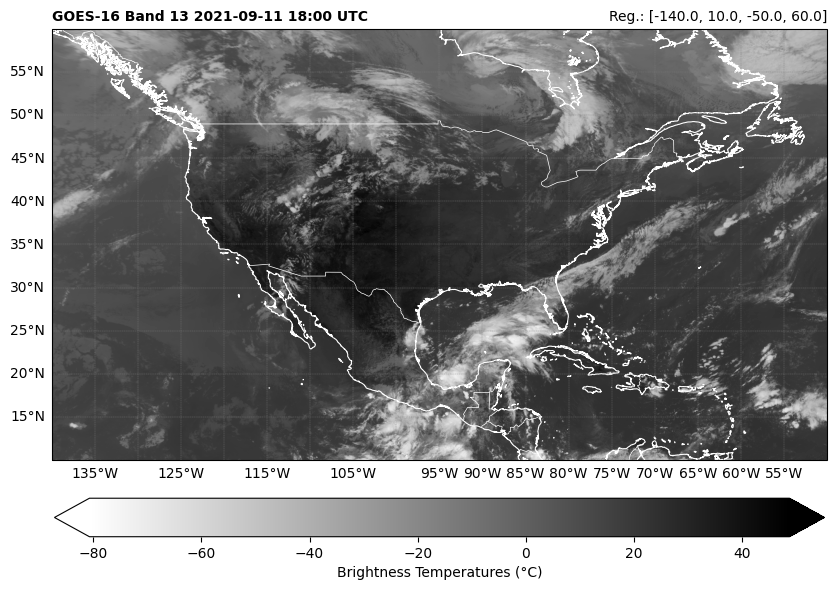

In [ ]:
#================================================================================================#
#                                  IMPORTANDO BIBLIOTECAS
#================================================================================================#
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import datetime                   # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import osr                           # Python bindings for GDAL
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python

import sys
sys.path.append(f'{dir}')
from utilities import download_CMI              # Our function for download
import time

import warnings
warnings.filterwarnings("ignore")

#================================================================================================#
#                                  DEFINIÇÕES INICIAIS
#================================================================================================#
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-140.0, 10.0, -50.0, 60.0] # Min lon, Min lat, Max lon, Max lat

# Datetime to process
yyyymmddhhmn = '202109111800'
band = '13'

# Download the file
file_name = download_CMI(yyyymmddhhmn, band, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds = (ds * scale + offset) - 273.15

# Read the original file projection and configure the output projection
source_prj = osr.SpatialReference()
source_prj.ImportFromProj4(img.GetProjectionRef())

target_prj = osr.SpatialReference()
target_prj.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

# Reproject the data
GeoT = img.GetGeoTransform()
driver = gdal.GetDriverByName('MEM')
raw = driver.Create('raw', ds.shape[0], ds.shape[1], 1, gdal.GDT_Float32)
raw.SetGeoTransform(GeoT)
raw.GetRasterBand(1).WriteArray(ds)

# Define the parameters of the output file
options = gdal.WarpOptions(format = 'netCDF',
          srcSRS = source_prj,
          dstSRS = target_prj,
          outputBounds = (extent[0], extent[3], extent[2], extent[1]),
          outputBoundsSRS = target_prj,
          outputType = gdal.GDT_Float32,
          srcNodata = undef,
          dstNodata = 'nan',
          xRes = 0.02,
          yRes = 0.02,
          resampleAlg = gdal.GRA_NearestNeighbour)

print(options)

# Write the reprojected file on disk
gdal.Warp(f'{dir}output/{file_name}_ret.nc', raw, options=options)
#-----------------------------------------------------------------------------------------------------------
# Open the reprojected GOES-R image
file = Dataset(f'{dir}output/{file_name}_ret.nc')

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{dir}output/GOES16_{yyyymmddhhmn}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()

# muda o nome do arquivo netcdf
current_file_name = f'{dir}output/{file_name}_ret.nc'
ano, mes, dia, hor, min = date.strftime('%Y'), date.strftime('%m'), date.strftime('%d'), date.strftime('%H'), date.strftime('%M')
new_file_name = f'{dir}output/GOES16_CH13_{ano}{mes}{dia}_{hor}{min}.nc'
os.rename(current_file_name, new_file_name)

In [ ]:
img_extent

[-140.0, -50.0, 10.0, 60.0]

In [ ]:
import xarray as xr
ds = xr.open_dataset(new_file_name)
ds

<xarray.Dataset>
Dimensions:  (lat: 2500, lon: 4500)
Coordinates:
  * lat      (lat) float64 59.99 59.97 59.95 59.93 ... 10.07 10.05 10.03 10.01
  * lon      (lon) float64 -140.0 -140.0 -139.9 -139.9 ... -50.05 -50.03 -50.01
Data variables:
    Band1    (lat, lon) float32 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.4.3, released 2022/04/22
    history:      Mon Sep 25 19:57:28 2023: GDAL Create( /content/drive/MyDri...

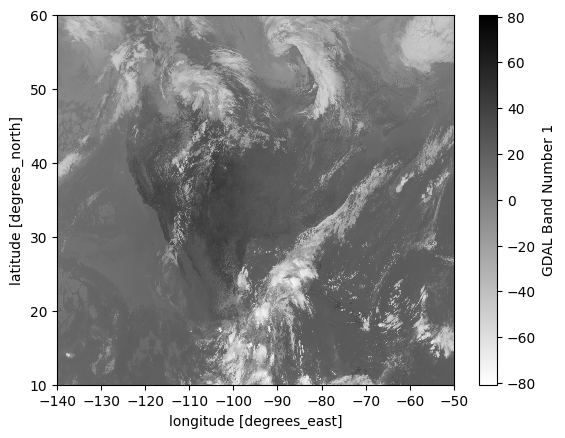

In [ ]:
ds['Band1'].plot(cmap=colormap)